In [1]:
#Muticlass Classification

#Muticlass Classification is a classification task which has 'one target variable' 
#and that target variable can be more than 2 classes 

In [2]:
import warnings
warnings.warn = lambda *a, **kw: False


from scipy.io import loadmat
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
mnist_raw = loadmat("mnist-original.mat")
X, Y = mnist_raw['data'].T, mnist_raw['label'].T
x_train, y_train, x_test, y_test = X[:60000], Y[:60000], X[60000:], Y[60000:]

shuffled_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffled_index], y_train[shuffled_index]
some_digit = X[36000]

In [3]:
#some algorithms are capable of handlingmuticlass classification directly (eg. RandomForest, Bayes classifier)
#but some algoritms(e.g. SGDClassification) do not have that capability (they support only binary classification)
#So, there are 2 ways to create muticlass classifier
#1. OvA: create binary classifiers equal to the number of classes. each clf responsible for classifing each classes
#2. OvO: create binary classifiers equal to the number of each pairs of class. each clf responsible for ditinguish between that pair of classes

In [4]:
#create muticlassifier using SGDClassifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train)

print("prediction of some_digit is", sgd_clf.predict([some_digit]))


#you can look at the decision score of each classifier
#and the highest score is corresponding to class 5
print ("score for each classes are ")
print (sgd_clf.decision_function([some_digit]))

prediction of some_digit is [5.]
score for each classes are 
[[-113127.42918324 -500345.07500293 -296767.6902453   -96996.52231522
  -619870.34413645  -19161.26819285 -794235.7539054  -381700.26168843
  -711143.73098082 -485967.84129898]]


In [9]:
#try OvO method
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(x_train, y_train)

print ("prediction of some_digit")
ovo_clf.predict([some_digit])
print ("number of classifier", len(ovo_clf.estimators_))

prediction of some_digit
number of classifier 45
decision scores are


array([[7.26692917, 2.89703187, 3.9651707 , 8.33291076, 4.90291258,
        9.5       , 0.61072833, 3.94081462, 1.75760668, 1.82589529]])

In [12]:
#try RandomForest which can handle muticlass directly
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(x_train, y_train)

forest_clf.predict([some_digit])

array([5.])

In [13]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0. , 0. , 0.9, 0. , 0.1, 0. , 0. ]])

In [15]:
#next, try to evaluate model performance using cross-validation
from sklearn.model_selection import cross_val_score
sgd_accuracy_scores = cross_val_score(SGDClassifier(random_state=42), x_train, y_train, cv=3, scoring='accuracy')
sgd_accuracy_scores
#you can use accuracy as measurement metric because the number of instances for each classes are balance

array([0.87227554, 0.86719336, 0.88293244])

In [17]:
#improve SGDClassifer using Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
sgd_scaledfeature_accuracy_scores = cross_val_score(SGDClassifier(random_state=42), x_train_scaled, y_train, cv=3, scoring='accuracy')
sgd_scaledfeature_accuracy_scores

array([0.90866827, 0.90744537, 0.91038656])

In [18]:
#the results are better because of feature scaling

In [38]:
#Error Analysis
#let's look at confusion matrix of the model
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
sgd_y_pred = cross_val_predict(SGDClassifier(random_state=42), x_train, y_train, cv=3)
sgd_conf_mx = confusion_matrix(y_train, sgd_y_pred)
sgd_conf_mx

array([[5686,    1,   45,   31,   29,   35,   45,    6,   42,    3],
       [   1, 6181,  200,   34,    9,   18,   16,   18,  246,   19],
       [  55,   19, 5373,   99,   69,   24,   88,   75,  138,   18],
       [  22,   25,  298, 5347,   20,  137,   35,   62,  124,   61],
       [  19,   25,   63,   16, 5219,   18,   59,   76,  104,  243],
       [  87,   24,   71,  406,  128, 4042,  141,   40,  390,   92],
       [  44,   12,   54,    6,   54,   70, 5620,    4,   53,    1],
       [  34,   10,  136,   26,   69,    3,    6, 5785,   24,  172],
       [  63,  114,  309,  270,  103,  239,   56,   59, 4538,  100],
       [  48,   27,   39,  146,  417,   50,    5,  445,  115, 4657]])

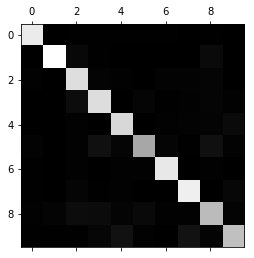

In [22]:
#it is more convinient to look of an image representing this matrix
plt.matshow(sgd_conf_mx, cmap=plt.cm.gray)
plt.show()

In [23]:
#the square representing the TP of 5 are pretty dark which means the model does not perform well on predicting 5 
#or it can means that there fewer 5 in training set

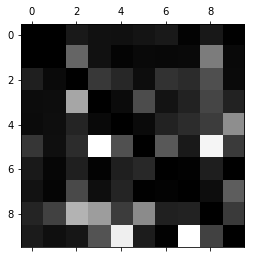

In [30]:
#let's get rid of the diagonal squares and compute error ratios
row_sums = sgd_conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = sgd_conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [31]:
#it seems like model often wrongly classify 5s as 3s and 8s
#and 9s are often wrongly classify as 7

In [39]:
#let's look at the images that are wrongly classified
# five_as_three = x_train[(y_train == 5) & (sgd_y_pred == 3)]
# five_as_eight = x_train[(y_train == 5) & (sgd_y_pred == 8)]
# nine_as_seven = x_train[(y_train == 9) & (sgd_y_pred == 7)]

# plt.figure(figsize=(8,8))
# plt.subplot(221); plot_digit(five_as_three[:25], images_per_row=5)
# plt.show()

In [40]:
#MutiLabel classification 
#In MutiLabel classification, classifier will output more than 1 label(e.g. [0, 1])

#let create model to predict if images are large number and if images are odd
y_train_large = (y_train > 7)
y_train_odd = (y_train % 2 == 1)
y_train_mutilabel = np.c_[y_train_large, y_train_odd]
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train_mutilabel)
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
#evaluate mutilabel classifier using F1 score
from sklearn.metrics import f1_score
y_train_pred = cross_val_predict(knn_clf, x_train, y_train_mutilabel, cv=3)
f1_score(y_train_mutilabel, y_train_pred, average='macro')

In [ ]:
#macro average give weight to each cla